<a href="https://colab.research.google.com/github/Chamara-g/pre-datastorm-v1-0/blob/master/pre_data_storm_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Day2 Final**

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

Traing data read and save to **df** dataframe

In [3]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_train.csv", index_col=0)
df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


Test data read and save to data frame **df_test**

In [4]:
#read test data set
df_test = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_data_test_pre.csv", index_col=0)
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714


String values covert into numarical values in **df_test**

In [0]:
#test data set pre processing

#convet to string balance limit to float
df_test.Balance_Limit_V1 = (df_test.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df_test.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df_test.head()

#gender education marital age stringto int convert
df_test.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df_test.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df_test.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df_test.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0


String values covert into numarical values in **df**

In [5]:
#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


**Univariant Selection**

Selected the best features base on univarient statistics

In [0]:
X = df.drop("NEXT_MONTH_DEFAULT",1)   #Feature Matrix
y = df["NEXT_MONTH_DEFAULT"]          #Target Variable

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score'))  #print 10 best features

             Feature        Score
5           PAY_JULY  2821.720487
6            PAY_AUG  1747.509329
7            PAY_SEP  1332.272524
8            PAY_OCT  1133.864880
9            PAY_NOV  1012.782178
10           PAY_DEC   870.510529
0   Balance_Limit_V1   544.413586
17     PAID_AMT_JULY   128.185743
18      PAID_AMT_AUG    83.939549
19      PAID_AMT_SEP    80.464002
20      PAID_AMT_OCT    75.880451
21      PAID_AMT_NOV    69.788740
22      PAID_AMT_DEC    66.241699
1             Gender    41.700850
2   EDUCATION_STATUS    36.373624
3     MARITAL_STATUS    18.701558
11      DUE_AMT_JULY     9.612801
12       DUE_AMT_AUG     5.531152
13       DUE_AMT_SEP     5.202269
14       DUE_AMT_OCT     2.283794
15       DUE_AMT_NOV     1.391450
16       DUE_AMT_DEC     1.020606
4                AGE     0.854891


**Feature Importance**

Calculate the feature importance score of each feature

[0.04737015 0.01398015 0.02600756 0.01413788 0.03240237 0.10173044
 0.05421894 0.03352165 0.03032598 0.02980974 0.03216354 0.05678672
 0.0508475  0.04886756 0.04869816 0.04706216 0.04865779 0.04866729
 0.0455244  0.0462324  0.04554736 0.04679117 0.05064911]


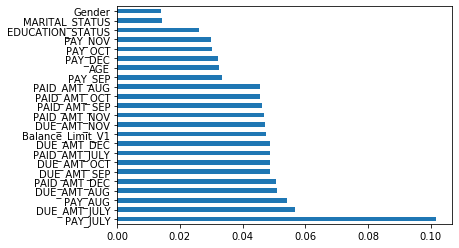

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

create new dataframe, change order using univarient statistics

In [10]:
selectedFeatures = featureScores.nlargest(24,'Score')
df_24F = df[selectedFeatures['Feature'].values]
# df_24F['NEXT_MONTH_DEFAULT'] = y
df_24F.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,Balance_Limit_V1,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender,EDUCATION_STATUS,MARITAL_STATUS,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,AGE
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A2,-1,-1,-1,-1,-1,-1,1000000.0,3437,6004,39418,162772,0,538165,1,2,1,3248,3389,6004,39418,162772,-13982,2
A3,0,-1,-1,-1,-1,0,1000000.0,151818,46200,43530,80811,942,33666,0,1,1,353351,151818,26948,43530,80811,124590,3
A4,4,3,2,2,-2,-2,100000.0,0,0,0,0,0,0,0,1,0,16681,16082,15477,0,0,0,2
A5,2,0,0,0,0,0,200000.0,3855,3890,3696,4620,4049,3918,0,2,0,90457,92848,95193,97309,100353,102740,2
A6,2,2,0,0,0,0,1000000.0,0,20790,16170,17325,16401,17325,0,2,1,429556,419466,429785,435354,445271,453899,2


In [0]:
def randomForest(dataFrame, target):

  #Create a RF Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

def returnScoreDataFrameModels(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in [28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16 , 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    lists3.append(randomForest(dataFrame.iloc[:,0:(i)], y))

  rows = ["randomForest"]

  data = np.array([lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore

Plot accuracy reducing the feature one by one

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib.pyplot as plt

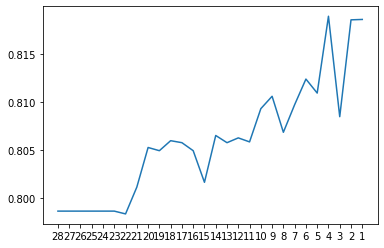

In [13]:
randomForestScore = returnScoreDataFrameModels(df_24F)

pcaScore = ["28", "27", "26", "25", "24", "23", "22", "21", "20", "19", "18", "17", "16" , "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"] 

plt.plot(pcaScore, randomForestScore["randomForest"], label='linear')


Found the most accuracy point and took those features into the model

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import train_test_split 

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

Print accuracy for DecisionTree, Random Forest, GradientBoosting and Ada Boost

In [0]:
def printClassificationResults(X_train, X_test, y_train, y_test):    

  dt_clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 

  RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
  RF_clf.fit(X_train, y_train)
  
  GB_clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
  score_GB = cross_val_score(GB_clf, X_train, y_train, cv=3)
  GB_clf.fit(X_train, y_train)

  AB_clf = AdaBoostClassifier(random_state=42,n_estimators=17)
  score_AB = cross_val_score(AB_clf, X_train, y_train, cv=3)
  AB_clf.fit(X_train, y_train)

  y_pred_dt = dt_clf.predict(X_test)
  y_pred_RF = RF_clf.predict(X_test)
  y_pred_GB = GB_clf.predict(X_test)
  y_pred_AB = AB_clf.predict(X_test)
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t\t Testing\t Training")
  print("Decision Tree model accuracy(in %) \t\t\t:", round(metrics.accuracy_score(np.int64(y_test.values), y_pred_dt)*100,4) ,"\t", round(score_dt.mean()*100,2))
  print("Random forest model accuracy(in %) \t \t\t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_RF)*100,4) ,"\t", round(score_RF.mean()*100,2))
  print("Gradient Boosting Classifier accuracy(in %) \t \t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_GB)*100,4) ,"\t", round(score_GB.mean()*100,2))
  print("Ada Boost Classifier accuracy(in %) \t \t\t:" , round(metrics.accuracy_score(np.int64(y_test.values), y_pred_AB)*100,4) ,"\t", round(score_AB.mean()*100,2))

In [0]:
#import copy
#def combinations(target,data):
     #for i in range(len(data)):
         #new_target = copy.copy(target)
         #new_data = copy.copy(data)
         #new_target.append(data[i])
         #new_data = data[i+1:]
         #print(new_target)
         #X_selected = X[new_target]
         #X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1) 
         #printClassificationResults(X_train, X_test, y_train, y_test)
         #combinations(new_target, new_data)

#target = []
#data = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC",	"DUE_AMT_JULY",	"DUE_AMT_AUG",	"DUE_AMT_SEP",	"DUE_AMT_OCT",	"DUE_AMT_NOV",	"DUE_AMT_DEC",	"PAID_AMT_JULY",	"PAID_AMT_AUG",	"PAID_AMT_SEP",	"PAID_AMT_OCT",	"PAID_AMT_NOV",	"PAID_AMT_DEC",	"DUE_AMT_GRD",	"PAID_AMT_GRD",	"PAY_GRD",	"PAY_DUE_GRD","Balance_Limit_V1",	"Gender",	"EDUCATION_STATUS",	"MARITAL_STATUS",	"AGE"]
#combinations(target,data)


Seleted four features input to the model

In [16]:
#selected_col_names = ["PAY_JULY"]
selected_col_names = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT"]
#selected_col_names = ["PAY_JULY",	"PAY_GRD",	"DUE_AMT_GRD",	"DUE_AMT_JULY",	"PAY_AUG",	"PAID_AMT_GRD", "Balance_Limit_V1"]
#selected_col_names = ["PAY_JULY",	"PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC"]
#selected_col_names = ["PAY_JULY" ,"Balance_Limit_V1" ,"PAY_AUG" ,"DUE_AMT_JULY" ,"DUE_AMT_AUG" ,"DUE_AMT_SEP" ,"PAID_AMT_JULY" ,"DUE_AMT_OCT" ,"AGE" ,"DUE_AMT_DEC"]
#selected_col_names = ["PAY_JULY", "DUE_AMT_JULY", "PAID_AMT_JULY", 'PAY_GRD', "Balance_Limit_V1", "DUE_AMT_GRD", "PAY_AUG",	"PAY_SEP",	"PAY_OCT",	"PAY_NOV",	"PAY_DEC"]

X_selected = X[selected_col_names]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1) 
printClassificationResults(X_train, X_test, y_train, y_test)

							 Testing	 Training
Decision Tree model accuracy(in %) 			: 82.1528 	 81.74
Random forest model accuracy(in %) 	 		: 82.1806 	 81.72
Gradient Boosting Classifier accuracy(in %) 	 	: 82.0972 	 81.18
Ada Boost Classifier accuracy(in %) 	 		: 82.0972 	 81.65


In [0]:
X_train = X_selected
y_train = y

Traing model for RF, Decision Tree, Gradient Boosting and Ada Boost

**Random Forest**

In [18]:
RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
score_RF = cross_val_score(RF_clf, X_train, y_train, cv=3)
RF_clf.fit(X_train, y_train)
(score_RF.mean())*100

81.89583333333333

In [19]:
X_test = df_test[selected_col_names]
y_pred_RF = RF_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_RF
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714,0


**Decision Tree**

In [20]:
  dt_clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 
  (score_dt.mean())*100

81.86250000000001

In [21]:
X_test = df_test[selected_col_names]
y_pred_DT = dt_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_DT
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714,0


**Ada Boost Classification**

In [22]:
  AB_clf = AdaBoostClassifier(random_state=42,n_estimators=17)
  score_AB = cross_val_score(AB_clf, X_train, y_train, cv=3)
  AB_clf.fit(X_train, y_train)
  (score_AB.mean())*100

81.79166666666667

In [23]:
X_test = df_test[selected_col_names]
y_pred_AB = AB_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_AB
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714,0


**Gradeint Boosting**

In [24]:
  GB_clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
  score_GB = cross_val_score(GB_clf, X_train, y_train, cv=3)
  GB_clf.fit(X_train, y_train)
  (score_GB.mean())*100

81.77499999999999

In [25]:
X_test = df_test[selected_col_names]
y_pred_GB = GB_clf.predict(X_test)
df_test["NEXT_MONTH_DEFAULT"] = y_pred_GB
df_test.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_GRD,PAID_AMT_GRD,PAY_GRD,PAY_DUE_GRD,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A20170,500000.0,1,0,0,2,0,0,0,0,0,0,194188,198510,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991,40937.571429,-3792.285714,0,18572.642857,0
A16887,200000.0,0,0,0,2,0,0,0,0,0,0,87115,89427,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620,2615.428571,210.971429,0,1413.200000,0
A3430,400000.0,1,0,1,3,-1,-1,2,0,0,-1,2693,9573,8984,11294,9561,993,6930,0,2310,0,2310,40060,-177.885714,4864.857143,-1,2343.485714,0
A3696,1500000.0,1,2,0,2,1,-1,-1,-2,-2,-2,0,5775,5775,0,0,0,5775,5775,0,0,0,0,-660.000000,-1320.000000,-7,-990.000000,0
A20474,100000.0,0,1,1,3,0,0,-2,-2,-2,-2,85257,0,0,0,0,0,0,0,0,0,0,0,-12179.571429,-0.000000,-8,-6089.785714,0


In [0]:
df_out = df_test['NEXT_MONTH_DEFAULT']
df_out.to_csv('drive/My Drive/FYP/dataset/credit_card_output_dt.csv', encoding='utf-8', mode='w', header=["NEXT_MONTH_DEFAULT"], index=True)